In [1]:
%run setup.py
%config IPython.matplotlib.backend = "retina"

In [27]:
from lib.histdist import distance_to_edge, reduce_samples
def plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename):
    
    idx = reduce_samples(xobs.shape[0], xpdv.shape[0])
    xpdv, ypdv = xpdv[idx], ypdv[idx]
    
    # result plot
    fig = plt.figure(figsize=mnras_size(square=True))
    axes = fig.subplots(nrows=1, ncols=1, squeeze=False).reshape(-1)
    
    axes[0].scatter(xobs, yobs, s=0.1, color="red", label="Kepler")
    axes[0].scatter(xpdv, ypdv, s=0.1, color="blue", label="Galaxia")
    axes[0].plot(xedge_obs, yedge_obs, "k--", linewidth=1., label="Kepler edge", zorder=100)
    axes[0].plot(xedge_pdv, yedge_pdv, "k-", linewidth=1., label="Galaxia edge", zorder=100)
    axes[0].grid(True, zorder=-10)
    
    if diagram =="tnu":
        axes[0].axis([0, 130, 0.0, 10.0])
        axes[0].set_xlabel("$\\nu_{\\rm max}$ ($\\mu$Hz)")
        axes[0].set_ylabel("$\Delta\\nu$ ($\\mu$Hz)")
    else:
        axes[0].axis([0., 5., 5., 30.])
        axes[0].set_xlabel("$M$ ($M_{\odot}$)")
        axes[0].set_ylabel("$R$ ($R_{\odot}$)")       
    
    axes[0].legend()
    
    # plt.show()
    plt.tight_layout()
    plt.savefig(overleaf_path+filename)
    # plt.close()


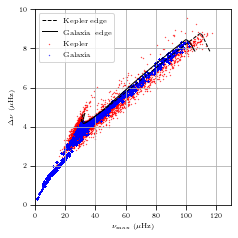

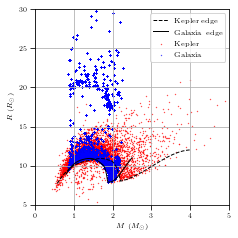

In [28]:
yu = np.load(work_path+'sample/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/yu/tnu_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/yu/nike_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["numax"], yu["dnu"]
xedge_obs, yedge_obs = edge[:,0], edge[:,1]

pdv = np.load(work_path+'sample/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/padova/tnu_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/padova/nike_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["numax"], pdv["dnu"]
xedge_pdv, yedge_pdv = edge[:,0], edge[:,1]


diagram = "tnu"
filename = "model_diagram_tnu.pdf"
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename)


yu = np.load(work_path+'sample/yu/yu18.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/yu/mr_edge_samples.npy')
tck_obs, tp_obs = np.load(work_path+"sample/yu/mr_spline_tck.npy", allow_pickle=True)
xobs, yobs = yu["mass"], yu["radius"]
xedge_obs, yedge_obs = edge[:,0], edge[:,1]

pdv = np.load(work_path+'sample/padova/padova.npy',allow_pickle=True).tolist()
edge = np.load(work_path+'sample/padova/mr_edge_samples.npy')
tck_pdv, tp_pdv = np.load(work_path+'sample/padova/mr_spline_tck.npy', allow_pickle=True)
xpdv, ypdv = pdv["mass"], pdv["radius"]
xedge_pdv, yedge_pdv = edge[:,0], edge[:,1]
diagram = "mr"
filename = "model_diagram_mr.pdf"
plot_model_diagram(diagram, xobs, yobs, xedge_obs, yedge_obs,
            xpdv, ypdv, xedge_pdv, yedge_pdv, filename)
